## Important packages

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

## FUN

In [ ]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

def con_matrix(model, actual, predict, title): 
  cm = confusion_matrix(actual, predict)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=model.classes_ ,).plot(cmap=plt.cm.Reds)
  plt.title(title)
  plt.show()
  return cm_display

In [ ]:
def bagging(model,model_n,xtrain,ytrain,xtest,ytest): 
  bag_model = BaggingClassifier(base_estimator=model, random_state=0)
  bag_model.fit(xtrain, ytrain)
  y_pred = bag_model.predict(xtest)
  acc_bag1 = accuracy_score(ytest, y_pred)
  print('Accuracy of bagging with {1}: {0:4f} %\n'.format(acc_bag1 *100, model_n))
  return bag_model , y_pred

In [ ]:
# def generate_random(start, end, num):
#   t1 = type(start)
#   t2 = type(end)
#   if t1 != float() and t2 != float():
#     import random
#     random.seed(0)
#     randomlist = random.sample(range(start, end), num)
#     randomlist.sort()
#     return randomlist
    
#   elif t1 == float() and t2 == float() :
#     import random
#     random_float_list = []
#     for i in range(0, num):
#       x = round(random.uniform(start,end), 2)
#       random_float_list.append(x)
#     random.seed(0)
#     return random_float_list      

In [ ]:
def generate_random(start, end, num):
  import random
  random.seed(0)
  randomlist = random.sample(range(start, end), num)
  randomlist.sort()
  return randomlist

In [ ]:
def generate_random_float(start, end, num):
  import random
  random_float_list = []
  for i in range(0, num):
    x = round(random.uniform(start,end), 2)
    random_float_list.append(x)
  random.seed(0)
  return random_float_list

In [ ]:
def results(dic):
  df_ = pd.DataFrame({'num' : dic.keys() , 'accuracy' : dic.values() })
  max_acc = df_['accuracy'].max()
  max_index = df_['accuracy'].idxmax()
  max_num = df_['num'][max_index]
  print('The number of estimators which give max accuracy is: {0}\n with max accuracy: {1}'.format(max_num,max_acc))
  return pd.DataFrame(df_) , max_num

In [ ]:
def boosting(model ,xtrain, ytrain,xtest,ytest ):
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)
  acc = accuracy_score(ytest, pred)
  print('Accuracy of Boosting : {0:4f} %\n'.format(acc *100))
  return pred

## Data

In [ ]:
#Load the pendigits datasets
!gdown --id 1ilWw33hGDAmn6dOR1UFLwEZM1lDj5ijG
!gdown --id 1CJZ5i7tEJP1gXzoMeOKdyjljvpblm12y

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ilWw33hGDAmn6dOR1UFLwEZM1lDj5ijG
To: /content/pendigits-tra.csv
100% 502k/502k [00:00<00:00, 82.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CJZ5i7tEJP1gXzoMeOKdyjljvpblm12y
To: /content/pendigits-tes.csv
100% 234k/234k [00:00<00:00, 71.2MB/s]


In [ ]:
column_names=['01', '02', '03', '04','05','06', '07', '08', '09','10','11', '12', '13', '14','15','16','17']
Train = pd.read_csv('/content/pendigits-tra.csv' ,names=column_names)
Test = pd.read_csv('/content/pendigits-tes.csv',names=column_names)

In [ ]:
x_train = Train.iloc[:,:-1]
y_train = Train.iloc[:,-1]

x_test = Test.iloc[:,:-1]
y_test = Test.iloc[:,-1]

## Decision tree

In [ ]:
dt = DecisionTreeClassifier(random_state=2022)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {} %'.format(acc *100))

Accuracy : 91.59519725557462 %


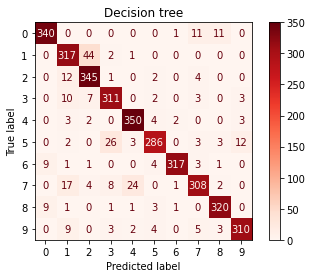

In [ ]:
con_matrix(dt,y_test, y_pred,'Decision tree')

## Bagging

**Bagging with SVM**

Accuracy of bagging with SVM: 98.170383 %



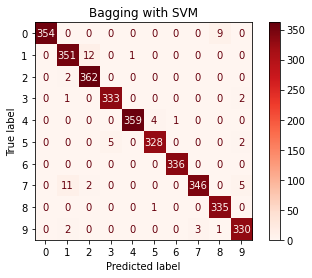

In [ ]:
SVM = SVC(random_state = 0)
svm_bagging, svm_pred =bagging(SVM,'SVM',x_train,y_train,x_test,y_test)
con_matrix(svm_bagging ,y_test, svm_pred,'Bagging with SVM')

**Bagging with Decision_tree**

Accuracy of bagging with DecisionTree: 94.797027 %



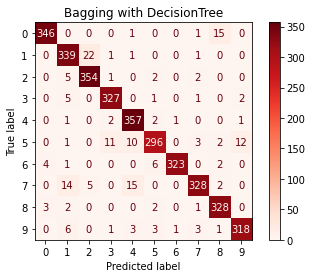

In [ ]:
DT = DecisionTreeClassifier(random_state = 0)
DT_bagging, DT_pred =bagging(DT ,'DecisionTree',x_train,y_train,x_test,y_test)
con_matrix(DT_bagging ,y_test, DT_pred ,'Bagging with DecisionTree')

**Hard voting**

Voting Classifier Accuracy : 94.053745 %



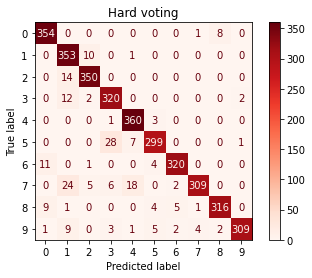

In [ ]:
from pandas.core.common import random_state
vo_clf = VotingClassifier(estimators=[('SVM', SVM), ('DecisionTree', DT)], voting='hard')
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting Classifier Accuracy : {0:4f} %\n'.format(accuracy_score(y_test, pred)*100))
con_matrix(vo_clf ,y_test, pred,'Hard voting')

**Best number of estimators**

In [ ]:
#Generate 5 random numbers between 10 and 200
randomlist = generate_random(10, 200, 5)

accuracies = {}
for nEst in randomlist:
  bagcls = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators=nEst,random_state=0)
  bagcls.fit(x_train, y_train)
  e_pred = bagcls.predict(x_test)
  acc = accuracy_score(y_test, e_pred)
  accuracies[nEst]= acc

accuracies , best_est = results(accuracies)

The number of estimators which give max accuracy is: 117
 with max accuracy: 0.9531160663236135


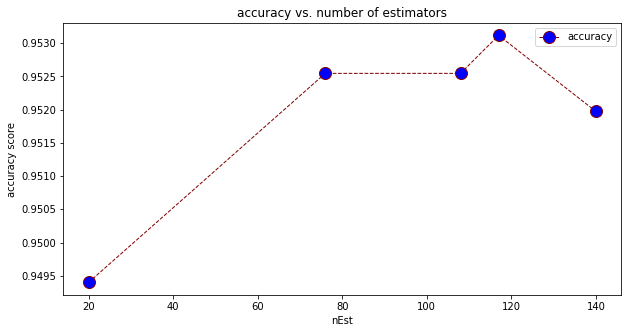

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(accuracies['nEst'], accuracies['accuracy'] , label = "accuracy", 
         color='maroon', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=12)
plt.title('accuracy vs. number of estimators')
plt.xlabel('nEst')
plt.ylabel('accuracy score')
plt.legend()
plt.show()  

## Boosting

In [ ]:
#Generate 4 random numbers between 10 and 200
random_estimators = generate_random(10, 200, 4)
accurac1 = {}
for nEst1 in random_estimators:
  boostcls = GradientBoostingClassifier(n_estimators= nEst1,random_state = 0)
  boostcls.fit(x_train, y_train)
  pred_b1 = boostcls.predict(x_test)
  acc_1 = accuracy_score(y_test, pred_b1)
  accurac1[nEst1]= acc_1
accurac1 , best_estimator = results(accurac1)

The number of estimators which give max accuracy is: 108
 with max accuracy: 0.9628359062321327


In [ ]:
#Generate 4 random numbers between 0.1 and 0.9
random_rates = generate_random_float (0.1, 0.9, 4)

accurac2 = {}
for learning_rate in random_rates:
    boostcls1 = GradientBoostingClassifier(n_estimators= best_estimator, learning_rate = learning_rate,random_state = 0)
    boostcls1.fit(x_train, y_train)
    pred_b2 = boostcls1.predict(x_test)
    acc_2 = accuracy_score(y_test, pred_b1)
    accurac2[learning_rate]= acc_2
accurac2 , best_rate = results(accurac2)

The number of estimators which give max accuracy is: 0.87
 with max accuracy: 0.9608347627215552


Accuracy of Boosting : 96.283591 %



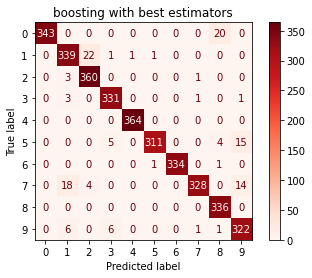

In [ ]:
gb0 = GradientBoostingClassifier(n_estimators= 108 ,random_state = 0)
pred_0 = boosting(gb0 ,x_train, y_train,x_test,y_test )
con_matrix(gb0 ,y_test, pred_0 ,'boosting with best estimators')

Accuracy of Boosting : 11.663808 %



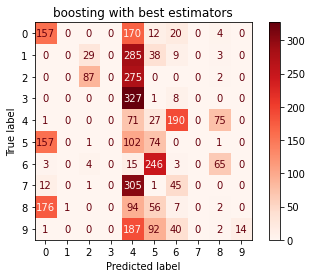

In [ ]:
gb = GradientBoostingClassifier(n_estimators= 108, learning_rate = 0.87 ,random_state = 0)
pred_boosting = boosting(gb ,x_train, y_train,x_test,y_test )
con_matrix(gb ,y_test, pred_boosting ,'boosting with best estimators')